# Exercise Set 6: Explainability

In this exercise set, we will be looking at explainability.

## Data

The dataset we will be looking at this time is a dataset regarding the determinants of wages from the 1985 Current Population Survey (Berndt, ER. The Practice of Econometrics. 1991. NY: Addison-Wesley), which is open source and available at [OpenML](https://www.openml.org/search?type=data&status=active&id=534). As last time, you're welcome to use a dataset of your own.

**Load data**

Here we load our input data into a `DataFrame` called `X` and our target data into a `Series` called `y`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Get wage data
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

X = survey.data[survey.feature_names]

y = survey.target

Here we describe the data using both the documentation which came with the data, but also by computing summary statistics for the input data and target data. 

In [3]:
print(survey.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Determinants of Wages from the 1985 Current Population Survey

Summary:
The Current Population Survey (CPS) is used to supplement census information between census years. These data consist of a random sample of 534 persons from the CPS, with information on wages and other characteristics of the workers, including sex, number of years of education, years of work experience, occupational status, region of residence and union membership. We wish to determine (i) whether wages are related to these characteristics and (ii) whether there is a gender gap in wages.
Based on residual plots, wages were log-transformed to stabilize the variance. Age and work experience were almost perfectly correlated (r=.98). Multiple regression of log wages against sex, age, years of education, work experience, union membership, southern residence, and occupational status showed that these covariates were related to wages (pooled F test, 

In [4]:
X.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [5]:
y.describe()

count    534.000000
mean       9.024064
std        5.139097
min        1.000000
25%        5.250000
50%        7.780000
75%       11.250000
max       44.500000
Name: WAGE, dtype: float64

In this exercise set, we will not perform hyperparameteroptimization, as this simplifies the code.

However, some methods can only explain the training data, whereas some can explain both the training and test data. To examine this, we split up the sample.

> **Exercise 1.1**
> 
> Fill in the missing code such that we split the data into 80% train and 20% test.
>
>> *Hints:*
>> 
>> We have previously looked at datasplitting. Try looking at last sessions exercises.

In [ ]:
from sklearn.model_selection import FILL IN

X_train, X_test, y_train, y_test = FILL IN(FILL IN, random_state=73)


In [7]:
### BEGIN SOLUTION

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=73)

### END SOLUTION

## Linear regression

In this section of the exercises, we will be looking at (regularized) linear regression.

We will be looking at different plots, and how regularizing linear regression with LASSO can create sparse models.

> **Exercise 2.1**
> 
> What does this code do? Fill in the missing comments.
>
>> *Hints:*
>> 
>> We have not used this functionality before. 
>>
>> If you're in doubt, try looking up the documentation.
>>
>> Think about how numerical and categorical variables should be encoded.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#
categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"]
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]

#
categorical_encoder = OneHotEncoder()

#
col_transformer = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'
)

In [8]:
### BEGIN SOLUTION

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Split columns into categorical and numerical 
categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"]
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]

# Create a method to one hot encode the categorical features
categorical_encoder = OneHotEncoder()

# Create a column transformer which one hot encodes categorical features and does nothing with the remainder
col_transformer = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'
)

### END SOLUTION

To start out with, we only introduce a slight amount of regularization. 

> **Exercise 2.2**
> 
> Fill in the missing code and comments to implement a LASSO regression with $\alpha=0.0001$.
>
>> *Hints*:
>>
>> We created a transformer for categorical columns in the previous exercise.
>>
>> We have looked at this in previous sessions. Try looking at those.

In [ ]:
from sklearn.pipeline import FILL IN 
from sklearn.linear_model import FILL IN 
from sklearn.preprocessing import FILL IN 

#
lasso_model = Pipeline([
    ('preprocessor',FILL IN),
    ('scaler', FILL IN),
    ('regr', FILL IN)
    ]
)

#
lasso_model.fit(X_train, y_train)

#
feature_names = lasso_model[:-1].get_feature_names_out()

#
lasso_coefs = pd.DataFrame(
    lasso_model[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

lasso_coefs

c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.181e+02, tolerance: 9.878e-01
  model = cd_fast.enet_coordinate_descent(


,Coefficients
RACE_Hispanic,-0.1641
RACE_Other,-0.1768
RACE_White,0.0528
OCCUPATION_Clerical,-0.1391
OCCUPATION_Management,0.7714
OCCUPATION_Other,-0.0206
OCCUPATION_Professional,0.6706
OCCUPATION_Sales,-0.2746
OCCUPATION_Service,-0.2886
SECTOR_Construction,0.0598


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 

# Create a pipeline which
# - one hot encodes categorical features
# - standardscales everything
# - implements a lasso
lasso_model = Pipeline([
    ('preprocessor', col_transformer),
    ('scaler', StandardScaler()),
    ('regr', Lasso(alpha=0.0001))
    ]
)

# Fit to training data
lasso_model.fit(X_train, y_train)

# Get the feature names from the last step (LASSO)
feature_names = lasso_model[:-1].get_feature_names_out()

# Create a df with coefficients
lasso_coefs = pd.DataFrame(
    lasso_model[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

pd.options.display.float_format = '{:,.10f}'.format
lasso_coefs

c:\Users\wkg579\.conda\envs\vive_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.181e+02, tolerance: 9.878e-01
  model = cd_fast.enet_coordinate_descent(


,Coefficients
RACE_Hispanic,-0.1640990547
RACE_Other,-0.1767820499
RACE_White,0.0528335182
OCCUPATION_Clerical,-0.1390938486
OCCUPATION_Management,0.7713821430
OCCUPATION_Other,-0.0205680735
OCCUPATION_Professional,0.6706017443
OCCUPATION_Sales,-0.2745718105
OCCUPATION_Service,-0.2886302041
SECTOR_Construction,0.0598077036


As we know from session 4, LASSO creates sparse models due to the corner solutions stemming from L1 normalization.

> **Exercise 2.3**
> 
> Looking at the coefficients from exercise 2.2, which coefficients are equal to zero?
> Why is the second line of code necessary to get the answer we intuitively agree with?
>
>> *Hints*:
>>
>> Think about numerical accuracy and computers.

In [15]:
print('Equal to zero')
print(lasso_coefs.loc[lasso_coefs.Coefficients == 0])
print()
print('Close to zero')
print(lasso_coefs.loc[np.isclose(lasso_coefs.Coefficients, 0)])

Equal to zero
          Coefficients
SEX_male  0.0000000000

Close to zero
                  Coefficients
MARR_Unmarried   -0.0000000000
UNION_not_member -0.0000000000
SEX_male          0.0000000000
SOUTH_yes        -0.0000000000


In [ ]:
### BEGIN SOLUTION
# This is due to float precision. The coefficients are very small, but techically not zero due to how computers work with floating point numbers.
# If one wants true zeroes, one could create a new model with the found coefficients changed to integer zero.
### END SOLUTION

> **Exercise 2.4**
> 
> The following code creates a weight plot for the coefficients. How should these be interpreted? Fill in the missing comments.
>
>> *Hints*:
>>
>> On what scale are the features measured?

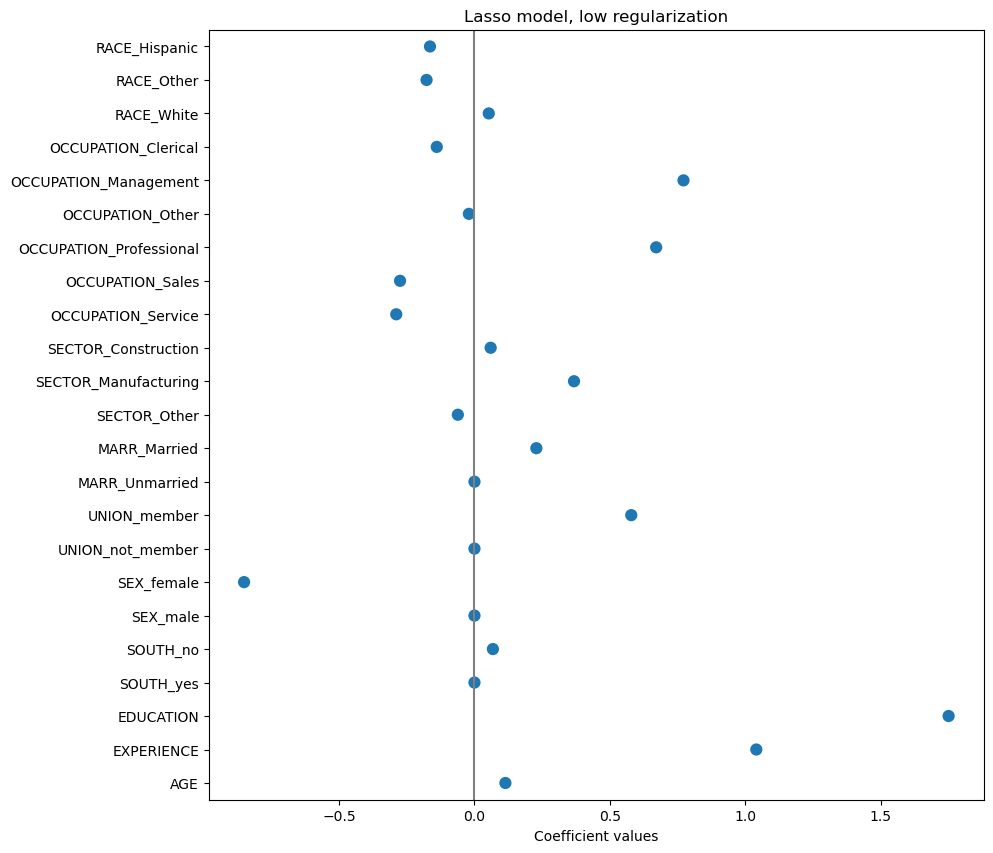

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
#
sns.pointplot(data=lasso_coefs.reset_index(), x='Coefficients', y='index', join=False, ax=ax)
#
plt.title("Lasso model, low regularization")
#
plt.axvline(x=0, color="grey", linestyle='--')
#
plt.xlabel("Coefficient values")
plt.ylabel('')
plt.show()

> **Exercise 2.5**
> 
> The following code creates an effect plot for the model. How should these be interpreted? Fill in the missing comments.
>
>> *Hints*:
>>
>> On what scale are the effects measured?
>>
>> What does `[:-1]` and `[-1]` select from the pipeline?

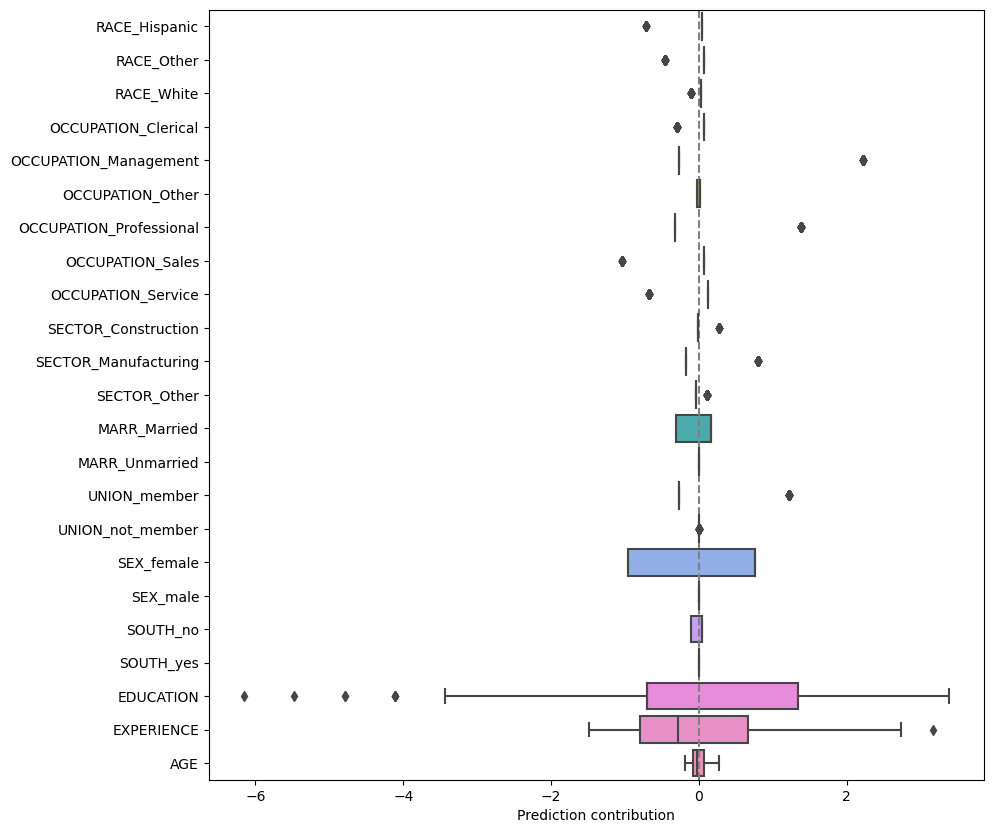

In [29]:
#
lasso_contributions = lasso_model[:-1].transform(X_train) * lasso_model[-1].coef_
df_lasso_contributions = pd.DataFrame(lasso_contributions, columns=feature_names)

#
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.boxplot(data=df_lasso_contributions, orient='h', ax=ax)
plt.axvline(x=0, color="grey", linestyle='--')
plt.xlabel('Prediction contribution')
plt.show()

In [ ]:
### BEGIN SOLUTION
# Calulate contributions as transformed covariates (both columntransformer and standardscaler) times coefficents (last pipeline step)
lasso_contributions = lasso_model[:-1].transform(X_train) * lasso_model[-1].coef_
df_lasso_contributions = pd.DataFrame(lasso_contributions, columns=feature_names)

# Create a boxplot with inserted vertical line
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.boxplot(data=df_lasso_contributions, orient='h', ax=ax)
plt.axvline(x=0, color="grey", linestyle='--')
plt.xlabel('Prediction contribution')
plt.show()
### END SOLUTION

> **Exercise 2.6**
> 
> The following code creates an effect plot for the model with an individual plotted as well. In what situations would a plot like this be useful? Fill in the missing comments.
>
>> *Hints*:
>>
>> Who's the receiver of the explanation?

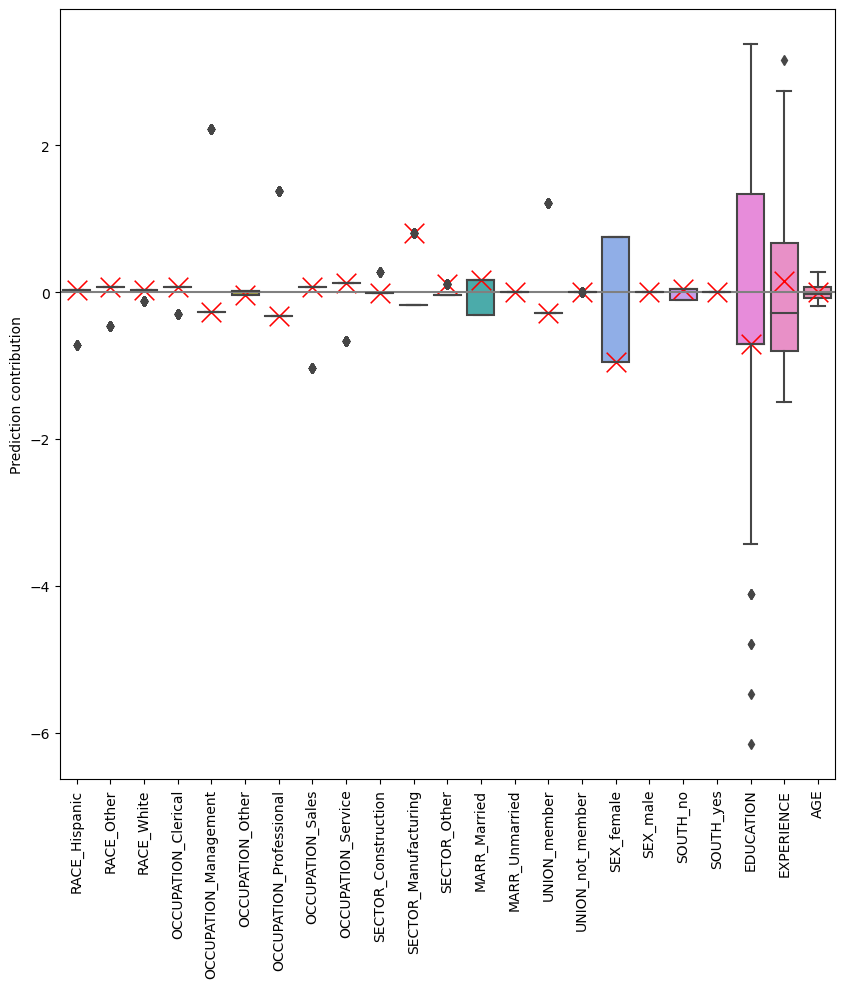

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.boxplot(data=df_lasso_contributions, ax=ax)
# 
sns.scatterplot(data=df_lasso_contributions.iloc[0].T, s=200, color="red", marker="x")
plt.xticks(rotation=90)
plt.axhline(y=0, color="grey", linestyle='--')
plt.ylabel('Prediction contribution')
plt.show()

In [ ]:
### BEGIN SOLUTION
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.boxplot(data=df_lasso_contributions, ax=ax)
# Add a scatterplot with the contributions for a single individual (here, individual zero)
sns.scatterplot(data=df_lasso_contributions.iloc[0].T, s=200, color="red", marker="x")
plt.xticks(rotation=90)
plt.axhline(y=0, color="grey", linestyle='--')
plt.ylabel('Prediction contribution')
plt.show()
### END SOLUTION

> **Exercise 2.7**
> 
> Try running the code with other values of $\alpha$. Does the model become easier to interpret? Are the same coefficients always high/low? 
>
>> *Hints*:
>>
>> Multicollinearity.

## Decision tree

In this section, we will be looking at how to plot decision trees as flowcharts. 

> **Exercise 3.1**
> 
> Fill in the missing code and comments to create a plot for a decision tree with max depth 1.
>
>> *Hints*:
>>
>> We've covered this in previous sessions. Try looking at our previous materials.

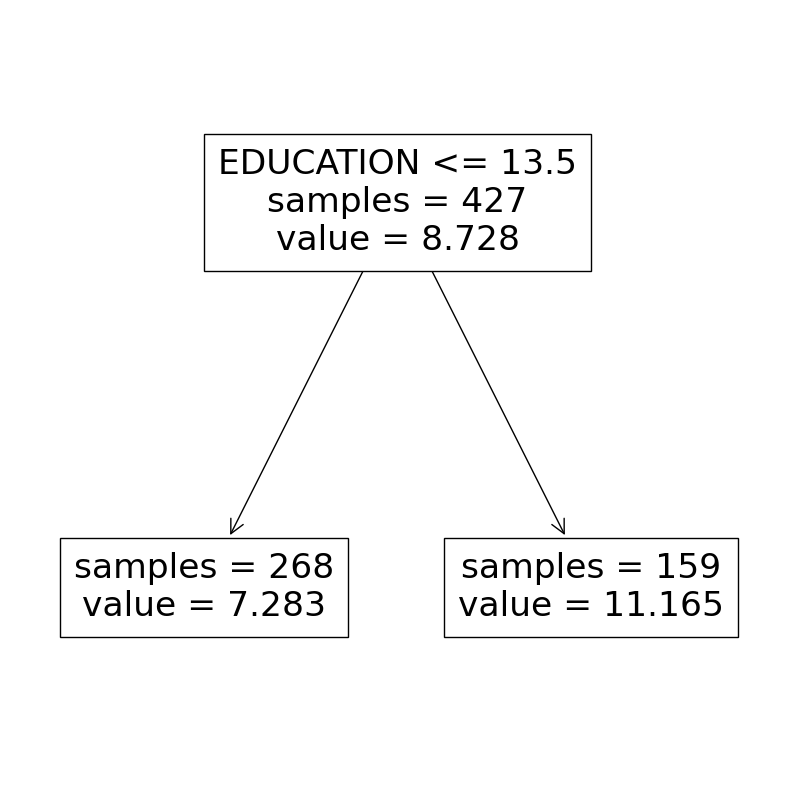

In [30]:
from sklearn.tree import plot_tree, FILL IN 

#
decision_model = Pipeline([
    ('preprocessor', col_transformer),
    ('regr', FILL IN)
    ]
)

#
decision_feature_names = decision_model[0].get_feature_names_out()

#
decision_model.fit(X_train, y_train)

#
plt.figure(figsize=(10,10)) 
plot_tree(decision_model[-1], feature_names = decision_feature_names, impurity=False)
plt.show()

In [ ]:
### BEGIN SOLUTION

from sklearn.tree import plot_tree, DecisionTreeRegressor


# Create pipeline with max_depth 1
decision_model = Pipeline([
    ('preprocessor', col_transformer),
    ('regr', DecisionTreeRegressor(max_depth=1))
    ]
)

# Fit to train
decision_model.fit(X_train, y_train)

# Plot flowchart
plt.figure(figsize=(10,10)) 
plot_tree(decision_model[-1], feature_names = feature_names, impurity=False)
plt.show()

### END SOLUTION

> **Exercise 3.2**
> 
> Repeat the following exercise with max depth 2 and 5. Is the model still explainable?
>
>> *Hints*:
>>
>> Are you explaining a single prediction or the full model?
>>
>> To increase legibility, try changing the `figsize` parameter, e.g. `(50,10)` for the larger model.

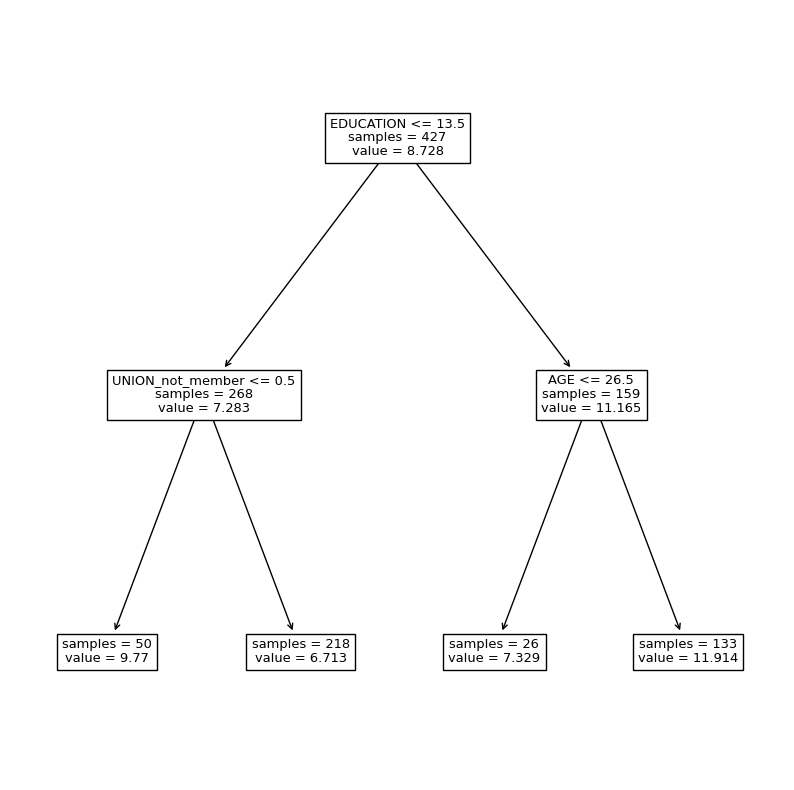

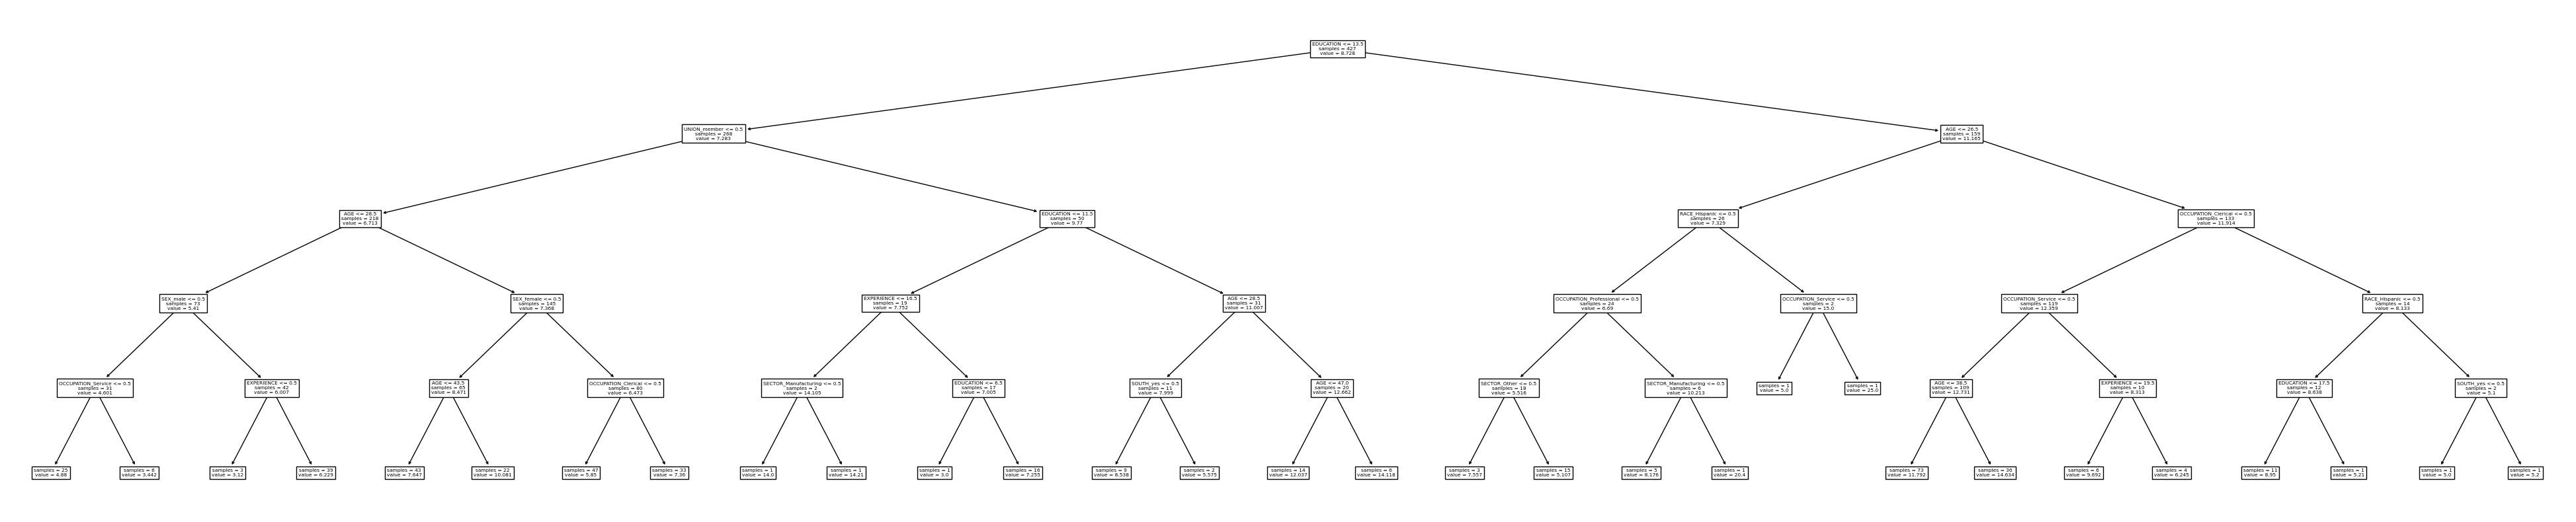

In [35]:
### BEGIN SOLUTION

fig_sizes = [(10,10), (50,10)]
depths = [2,5]

for depth, fig_size in zip(depths, fig_sizes):

    # Create pipeline with given max_depth
    decision_model = Pipeline([
        ('preprocessor', col_transformer),
        ('regr', DecisionTreeRegressor(max_depth=1))
        ]
    )

    # Fit to train
    decision_model.fit(X_train, y_train)

    # Plot flowchart
    plt.figure(figsize=fig_size) 
    plot_tree(decision_model[-1], feature_names = feature_names, impurity=False)
    plt.show()

### END SOLUTION

## Model agnostic methods

In this section of the exercises, we will cover model agnostic methods, such as permutation feature importance, partial dependence plots and SHAP values.

We first create a random forest model, which is not intrinsically interpretable. This is the model we want to understand.

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_model = Pipeline([
    ('preprocessor', col_transformer),
    ('regr', RandomForestRegressor())
    ]
)
forest_model.fit(X_train, y_train)

feature_names = forest_model[:-1].get_feature_names_out()

### Permutation feature importance

> **Exercise 4.1**
> 
> Fill in the missing comments to create a feature importance plot. How does one interpret these plots? What's the difference between the two plots?
>
>> *Hints*:
>>
>> How are permutation feature importances calculated, and what is measured? 

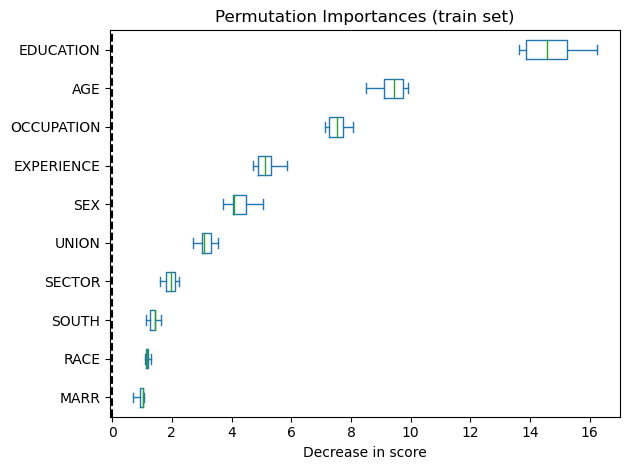

In [41]:
# One uses training data, other uses test data. 
# If model has picked up spurious correlation, 
# this will reduce training performance, 
# but not test performance

from sklearn.inspection import permutation_importance

# Calculate permutation feature importance on train data
result = permutation_importance(
    forest_model, X_train, y_train, n_repeats=10, random_state=73, n_jobs=2, scoring='neg_mean_squared_error'
)

# Sort importances by mean
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)

# Plot importances with boxplot
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in score")
ax.figure.tight_layout()

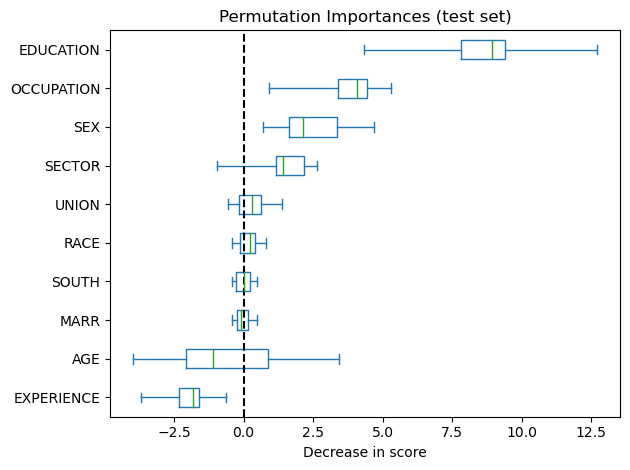

In [42]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance on test data
result = permutation_importance(
    forest_model, X_test, y_test, n_repeats=10, random_state=73, n_jobs=2, scoring='neg_mean_squared_error'
)

# Sort importances by mean
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)

# Plot importances with boxplot
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in score")
ax.figure.tight_layout()

### Partial dependencies

`sklearn.inspection` has built-in functionality for creating plots from partial dependencies. An example including both partial dependence plots and individual conditional expectations can be seen on [this page](https://scikit-learn.org/stable/modules/partial_dependence.html).

> **Exercise 4.2**
> 
> Create two one-way partial dependence plots for `EDUCATION` and `AGE`, as well as a two-way partial dependence plot in a single figure. Use the training data as background data.
>
>> *Hints*:
>>
>> This corresponds to part of the first plot on the webpage. 
>>
>> The code uses feature column indices to note what features to include.

0 EDUCATION
1 SOUTH
2 SEX
3 EXPERIENCE
4 UNION
5 AGE
6 RACE
7 OCCUPATION
8 SECTOR
9 MARR


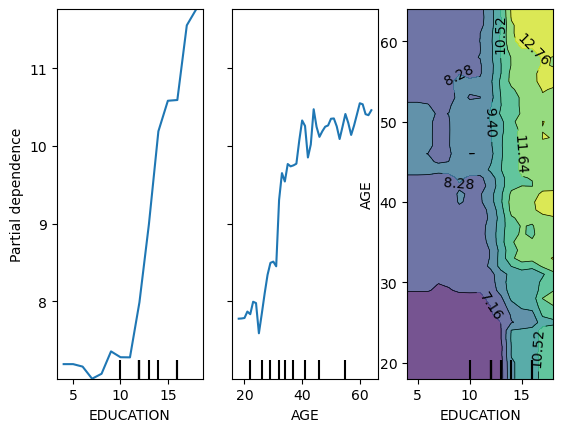

In [44]:
from sklearn.inspection import PartialDependenceDisplay

# Index to feature
for idx, col in enumerate(X_train.columns):
    print(idx, col)

# Alternatively, use dictionary
mapper = {name:idx for idx, name in enumerate(X.columns)}

# 
PartialDependenceDisplay.from_estimator(forest_model, X_train, [mapper['EDUCATION'], mapper['AGE'], (mapper['EDUCATION'], mapper['AGE'])])
plt.show()

In [ ]:
### BEGIN SOLUTION

from sklearn.inspection import PartialDependenceDisplay

# Index to feature
for idx, col in enumerate(X_train.columns):
    print(idx, col)

# Alternatively, use dictionary
mapper = {name:idx for idx, name in enumerate(X.columns)}

# Input model, data and columns
PartialDependenceDisplay.from_estimator(forest_model, X_train, [mapper['EDUCATION'], mapper['AGE'], (mapper['EDUCATION'], mapper['AGE'])])
plt.show()

Instead of masking the heterogeneity, we can also limit ourselves to one-way plots and display the heterogeneity in the partial dependencies, creating so-called individual expectation plots.

> **Exercise 4.3**
> 
> Create an individual conditional expectation plot for both `EDUCATION` and `AGE` in a single plot. It should first be uncentered and then centered, and always include the average. Which do you prefer?
>
>> *Hints*:
>>
>> Change the `kind` of the plot

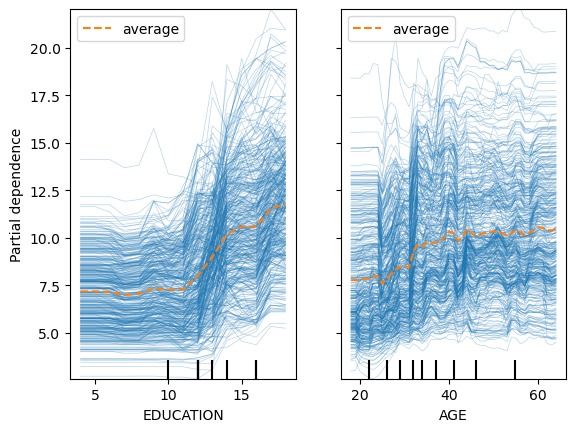

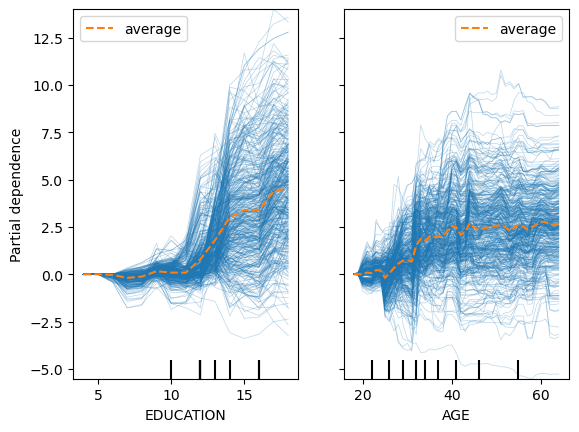

In [45]:
### BEGIN SOLUTION

PartialDependenceDisplay.from_estimator(forest_model, X_train, [mapper['EDUCATION'], mapper['AGE']], kind='both')
plt.show()
PartialDependenceDisplay.from_estimator(forest_model, X_train, [mapper['EDUCATION'], mapper['AGE']], kind='both', centered=True)
plt.show()

### END SOLUTION

## SHAP

Finally, we have the game theoretically founded SHapley Additive exPlanations, which are calculated using the [SHAP](https://github.com/slundberg/shap) package. They have a lot of different examples on their page, so look to there for code! 

Note that all of the following plots can be created using a single line of code, which perhaps is also one of the causes for it's popularity. 


> **Exercise 4.4**
> 
> Fill in the missing comments, and explain to yourself what each of the inputs to the `shap.TreeExplainer` does.
>
> Does the fact that we use training data as our background data influence what observations we can calculate SHAP values for?
>
>> *Hints*:
>>
>> The `shap.TreeExplainer` only accepts arrays as data input.
>>
>> What is the background data used for?

In [62]:
import shap

#
forest_feature_names = forest_model[:-1].get_feature_names_out()

#
X_train_as_array = forest_model[:-1].transform(X_train)

#
explainer = shap.TreeExplainer(model = forest_model[-1], data = X_train_as_array, feature_names=forest_feature_names, seed=73, feature_perturbation = 'interventional')

#
shap_values = explainer(X_train_as_array,)

 96%|=================== | 411/427 [00:15<00:00]       

In [ ]:
### BEGIN SOLUTION

import shap

# get feature names for plots
forest_feature_names = forest_model[:-1].get_feature_names_out()

# convert df to array using columntransformer
X_train_as_array = forest_model[:-1].transform(X_train)

# create an explainer, with the following parameters
# - Should explain the last step of the pipeline, i.e. the random forest
# - Should use the training data as the background covariates when perturbing the features
# - Use the given feature names for plots
# - Seed for replicability
# - Do interventional feature perturbation (true to the model), and not path dependent (true to the data). Would also not need data if path dependent
explainer = shap.TreeExplainer(model = forest_model[-1], data = X_train_as_array, feature_names=forest_feature_names, seed=73, feature_perturbation = 'interventional')

# Calculate the SHAP values for the given data
shap_values = explainer(X_train_as_array,)

# We could also calculate SHAP values for any other data with the same format, data is only used when perturbing

### END SOLUTION

> **Exercise 4.5**
> 
> Create a `force` plot of the first observation
>
>> *Hints*:
>> 
>> If the package complains regarding initialization of js, try adding `matplotlib=True`

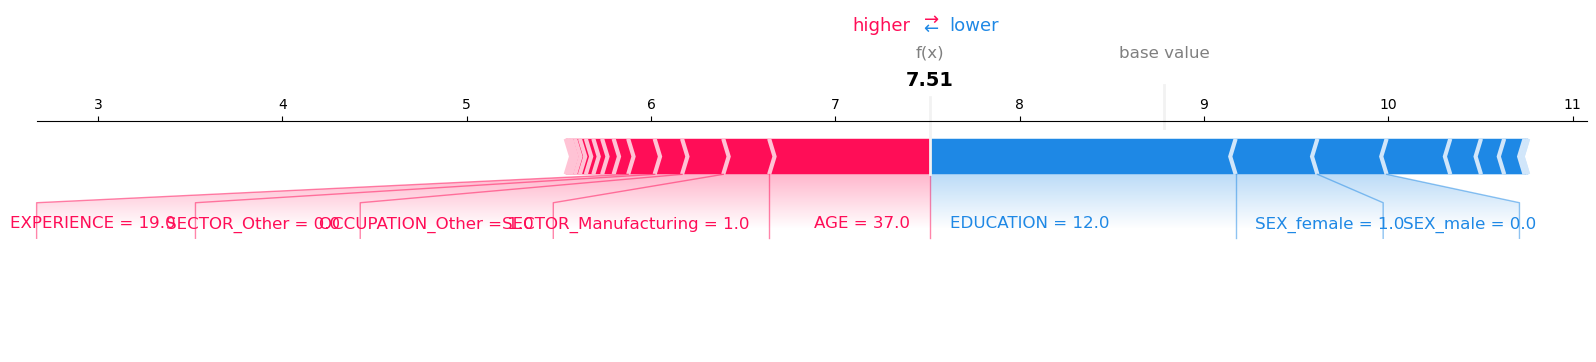

In [56]:
### BEGIN SOLUTION

shap.plots.force(shap_values[0], matplotlib=True)

### END SOLUTION

> **Exercise 4.5**
>
> Sometimes the force plots can get a bit messy with long column names.
> 
> Create a `waterfall` plot of the first observation.
>
> Did it help with the issue? What are possible downsides?

In [1]:
### BEGIN SOLUTION

shap.plots.waterfall(shap_values[0])

# More legible, but takes up more space. This can be infeasible if more than a single observation is to be explained

### END SOLUTION

> **Exercise 4.6**
>
> Although SHAP values are local explanations, they can still be aggregated for groups to gain global insights.
> 
> Create a `bar` plot of the mean absolute SHAP value for each feature  

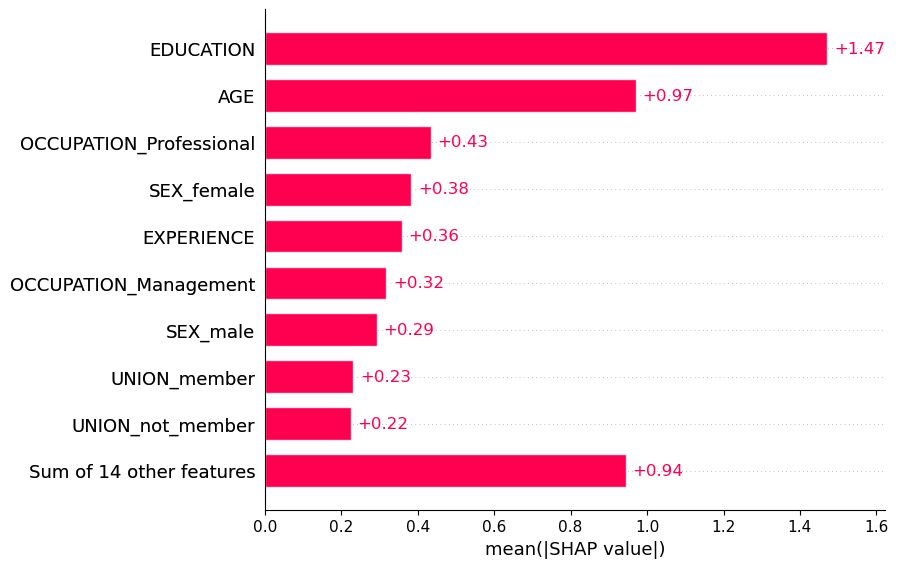

In [64]:
### BEGIN SOLUTION

shap.plots.bar(shap_values)

### END SOLUTION

> **Exercise 4.7**
>
> We can also create plots akin to partial dependence plots, examining heterogeneity for different values of a feature
> 
> Create a `scatter` plot of the SHAP values for `EDUCATION`  

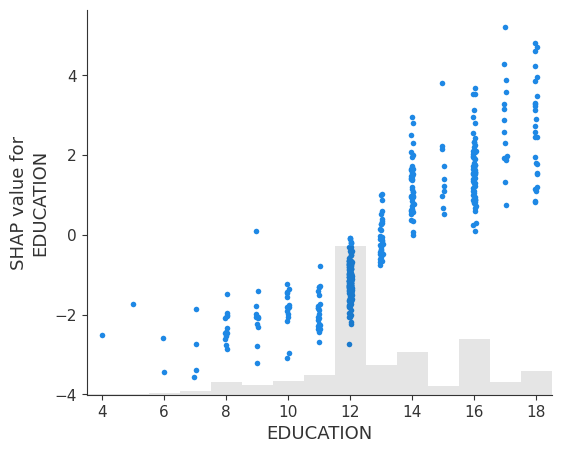

In [59]:
### BEGIN SOLUTION

shap.plots.scatter(shap_values[:,"EDUCATION"])

### END SOLUTION

> **Exercise 4.8**
> 
> To examine interactions between features, dependence plots can be coloured by another feature. 
> 
> Create a `scatter` plot of the SHAP values for `EDUCATION` where the colour is decided by the value of `AGE`

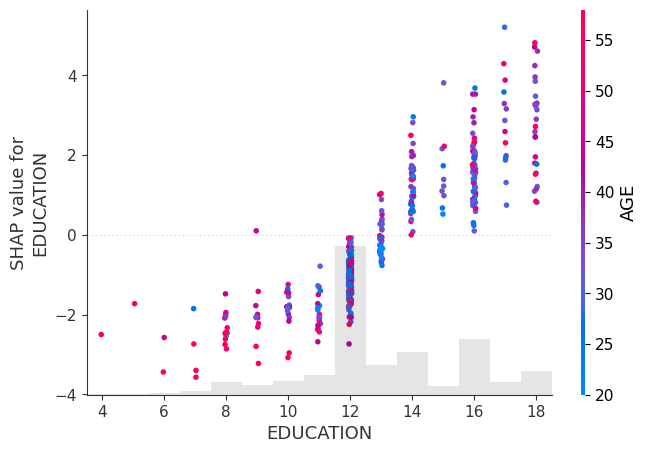

In [60]:
### BEGIN SOLUTION

shap.plots.scatter(shap_values[:, 'EDUCATION'], shap_values[:, 'AGE'])

### END SOLUTION

Finally, we can examine heterogeneity for multiple features at once using `beeswarm` plots.

> **Exercise 4.9**
> 
> Create a `beeswarm` plot of the SHAP values.

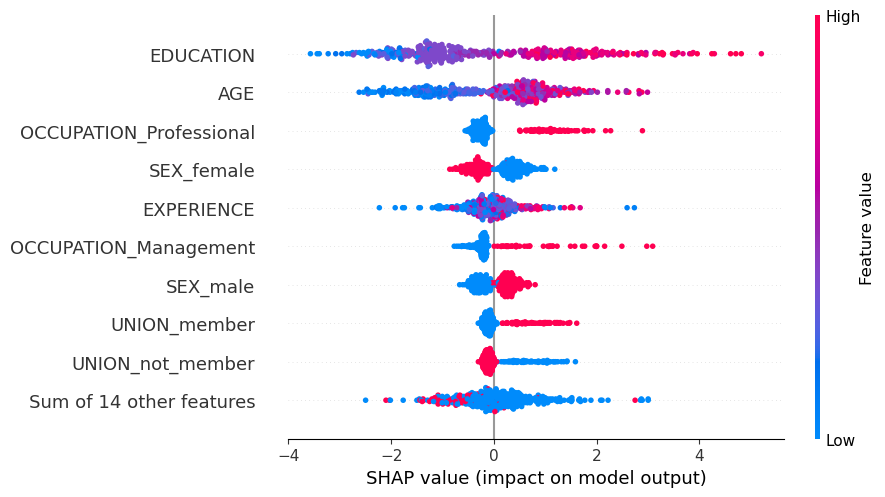

In [61]:
### BEGIN SOLUTION

shap.plots.beeswarm(shap_values)

### END SOLUTION